# Bit-plane Slicing in Digital Image Processing

Probably you must be known that everything on a computer is stored as a strings of bits. In Bit-plane slicing, we take benefit of this fact to perform various image operations.

For an 8-bit image, a pixel value of 0 is represented as 00000000 in binary form and 255 is encoded as 11111111.

Here, the leftmost bit is known as the Most Significant Bit(MSB) as it contributes the maximum. e.g. if MSB of 11111111 is changed to 0(i.e. 01111111), then the value changes from 255 to 127.
Similarly, rightmost bit is known as Least Significant Bit(LSB).

In Bit-plane slicing, we divide the image into bit planes. This is done by first converting the pixel values in the binary form and then dividing it into bit planes.

Let's take an example.

For simplicity, let's take a 3x3, 3-bit image as shown below.
We know that the pixel values for 3-bit can take values between 0 to 7.

![bit-plane-slicing.png](img/bit-plane-slicing.png)


# Pros:
* Image Compression
* Converting a gray level image to a binary image.
* Through this, we can analyze the relative importance of each bit in in the image that will help in determining the number of bits used to quantize the image.

In [5]:
# @KhomZ
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Read the image in grayscale
img = cv2.imread('img/coin.jpg',0)

In [3]:
# Iterate over each pixel 
# and change pixel value to binary using np.binary_repr() 
# and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        lst.append(np.binary_repr(img[i][j], width=8))  # width = no. of bits


# We have a list of strings where each string represents binary pixel value. 
# To extract bit planes we need to iterate over the strings 
# and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst], dtype=np.uint8) * 128).reshape(img.shape[0], img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst], dtype=np.uint8) * 64).reshape(img.shape[0], img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst], dtype=np.uint8) * 32).reshape(img.shape[0], img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst], dtype=np.uint8) * 16).reshape(img.shape[0], img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst], dtype=np.uint8) * 8).reshape(img.shape[0], img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst], dtype=np.uint8) * 4).reshape(img.shape[0], img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst], dtype=np.uint8) * 2).reshape(img.shape[0], img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst], dtype=np.uint8) * 1).reshape(img.shape[0], img.shape[1])


# Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img, seven_bit_img, six_bit_img, five_bit_img])
finalv = cv2.hconcat([four_bit_img, three_bit_img, two_bit_img, one_bit_img])

# Vertically concatenate
final = cv2.vconcat([finalr, finalv])

# Display the images
cv2.imshow('a', final)
cv2.waitKey(0)

-1

In [4]:

file_name_path = r"img\result.jpg"
cv2.imwrite(file_name_path, final)

True

# Output:
The output of Bit-plane Slicing looks like this:

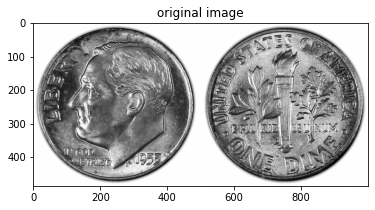

In [8]:
# show original image
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')

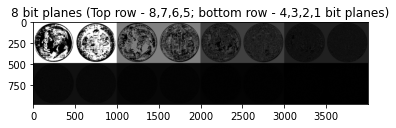

In [9]:
# show output
plt.imshow(final)
plt.title('8 bit planes (Top row - 8,7,6,5; bottom row - 4,3,2,1 bit planes)')
plt.set_cmap('gray')

Clearly from the above figure, the last 4 bit planes do not seem to have much information in them.

Now, if we combine the 8,7,6,5 bit planes, we will get approximately the original image as shown below.

In [10]:
# code for combining the 8,7,6,5 bit planes.
# combining 4 bit planes
new_img = eight_bit_img + seven_bit_img + six_bit_img + five_bit_img

# Display the image
cv2.imshow('a', new_img)
cv2.waitKey(0)

-1

In [11]:
file_name_path = r"img\new_img_4bitplanes.jpg"
cv2.imwrite(file_name_path, new_img)

True

Text(0.5, 1.0, 'Image using 4 bit planes (8,7,6,5)')

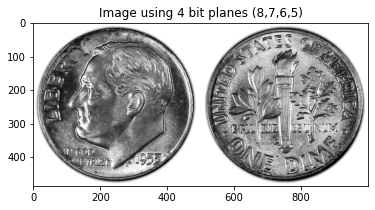

In [13]:
# show output
plt.imshow(new_img)
plt.title('Image using 4 bit planes (8,7,6,5)')
# plt.set_cmap('gray')

Clearly, storing these 4 frames instead of the original image requires less space. Thus, it is used in Image Compression.

# Wrap Up
Wrapping up, I came to know pretty much about Bit plane slicing. I hope so do you. If you discover any other application of this, please let me know. Happy Learning!

Have some feedbacks, please feel free to share. Good-bye until next time.